In [12]:
import jieba
import jieba.analyse
import pandas as pd
import numpy as np
from collections import Counter


In [13]:
#讀取資料
orgdata = pd.read_csv('greenhotel.csv')

In [14]:
orgdata.head()

,旅店名稱,CountyCode,AreaCode,Village,StreetDoorPlate,聯絡電話,111年優惠方案
0,台灣詩路民宿,67000,67000020,田寮里,68號,927563237,本旅館(宿)為響應環保，即日起至2022年12月31日止，民眾自備盥洗用具或續住不換床單毛巾...
1,ALife 好生活整合國際旅宿,67000,67000020,NaN,朝琴路127-2號,0933-352757,本民宿為響環保，主動參與環保署辦理環保旅店即日起至111年12月31日，凡民眾自備盥洗用品，...
2,沐春民宿,67000,67000030,關嶺里,27號,06-6823232,"即日起至2022年12月31日止,民眾自備一次性備品，包含牙刷、牙膏、梳子、浴帽、拋棄式拖鞋..."
3,芳谷旅社,67000,67000030,NaN,關子嶺24-11號,06-6822222,即日起至2022年12月31日止，民眾自備盥洗用具及續住不換床單毛巾，房價折抵100元，此優...
4,關仔嶺統茂溫泉會館,67000,67000030,NaN,關子嶺28號,06-6823456#109,本會館不主動提供一次性備品(如


In [15]:
documents = ['我是臺灣師範大學科技系114級黃鈺娟']#一段字串
# 精確模式
for sentence in documents:
    seg_list = jieba.cut(sentence)#用jieba做cut斷詞
    print('/'.join(seg_list))#印出來的內容用斜線隔開

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\Olivia\AppData\Local\Temp\jieba.cache
Loading model cost 0.802 seconds.
Prefix dict has been built successfully.


我/是/臺/灣師/範大學/科技/系/114/級黃鈺娟


In [17]:
jieba.load_userdict('./userdict.txt')#自己建立斷詞文本

for sentence in documents:
    seg_list = jieba.cut(sentence)
    print('/'.join(seg_list))

我/是/臺灣師範大學/科技系/114級/黃鈺娟


In [18]:
#新增一個新欄位
orgdata['seg'] = ""
orgdata.head()

,旅店名稱,CountyCode,AreaCode,Village,StreetDoorPlate,聯絡電話,111年優惠方案,seg
0,台灣詩路民宿,67000,67000020,田寮里,68號,927563237,本旅館(宿)為響應環保，即日起至2022年12月31日止，民眾自備盥洗用具或續住不換床單毛巾...,
1,ALife 好生活整合國際旅宿,67000,67000020,NaN,朝琴路127-2號,0933-352757,本民宿為響環保，主動參與環保署辦理環保旅店即日起至111年12月31日，凡民眾自備盥洗用品，...,
2,沐春民宿,67000,67000030,關嶺里,27號,06-6823232,"即日起至2022年12月31日止,民眾自備一次性備品，包含牙刷、牙膏、梳子、浴帽、拋棄式拖鞋...",
3,芳谷旅社,67000,67000030,NaN,關子嶺24-11號,06-6822222,即日起至2022年12月31日止，民眾自備盥洗用具及續住不換床單毛巾，房價折抵100元，此優...,
4,關仔嶺統茂溫泉會館,67000,67000030,NaN,關子嶺28號,06-6823456#109,本會館不主動提供一次性備品(如,


In [65]:
jieba.analyse.set_stop_words('stopwords.txt') #自己建一個贅字檔
index = 0
for documents in orgdata['111年優惠方案']: #將檔案的111年優惠方案欄位利用迴圈存入documents
    if isinstance(documents, (int, float)):
        documents = str(documents)
    seg_list = jieba.analyse.extract_tags(documents, 150) #150是前150個權重最高的單詞
    #seg_list = jieba.lcut(documents) #不刪除贅字
    orgdata['seg'].iloc[index] = seg_list#存入seg_list
    index += 1
    

C:\Users\Olivia\AppData\Local\Temp\ipykernel_23224\568924660.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orgdata['seg'].iloc[index] = seg_list#存入seg_list


In [66]:
orgdata['seg']

0      [優惠, 民宿, 另行通知, 旅館, 為響, 應環保, 日止, 自備, 或續, 不換, 床單...
1      [環保, 民宿, 為響, 主動, 環保署, 辦理, 凡民, 眾自備, 依當, 房價, 以鼓勵...
2      [浴帽, 日止, 自備, 備品, 拋棄式, 依飯店, 規定, 春舍, 雙人房, 2600, ...
3      [日止, 自備, 及續, 不換, 床單, 房價, 優惠, 適用, 期間, 及國定, 折抵, ...
4                                [本會館, 不主動, 備品, 一次性, 提供]
                             ...                        
105    [民宿, 為響, 應環保, 主動, 環保署, 辦理, 環保, 自備, 優惠, 房價, 盥洗,...
106    [旅館, 環保, 為響, 應環保, 主動, 環保署, 辦理, 預訂, 民眾續, 換床, 訂房...
107                                        [06, 2212288]
108    [旅館, 環保, 為響, 應環保, 主動, 環保署, 辦理, 預訂, 民眾續, 換床, 訂房...
109    [旅館, 環保, 為響, 應環保, 主動, 環保署, 辦理, 預訂, 民眾續, 換床, 訂房...
Name: seg, Length: 110, dtype: object

In [67]:
type(orgdata['seg'])

pandas.core.series.Series

In [68]:
#pandas轉成list
orgdata_seg_list = orgdata['seg'].tolist()
type(orgdata_seg_list)

list

In [69]:
orgdata_seg_list

[['優惠',
  '民宿',
  '另行通知',
  '旅館',
  '為響',
  '應環保',
  '日止',
  '自備',
  '或續',
  '不換',
  '床單',
  '適用',
  '期間',
  '及國定',
  '為主',
  '活動',
  '內容',
  '明及',
  '之權利',
  '盥洗',
  '用具',
  '住宿',
  '毛巾',
  '修改',
  '保留',
  '方案',
  '公告'],
 ['環保',
  '民宿',
  '為響',
  '主動',
  '環保署',
  '辦理',
  '凡民',
  '眾自備',
  '依當',
  '房價',
  '以鼓勵',
  '落實',
  '環保行',
  '盥洗',
  '旅店',
  '用品',
  '公告'],
 ['浴帽',
  '日止',
  '自備',
  '備品',
  '拋棄式',
  '依飯店',
  '規定',
  '春舍',
  '雙人房',
  '2600',
  '10%',
  '服務費',
  '優惠',
  '適用',
  '期間',
  '及國定',
  '進行',
  '暫緩',
  '服務',
  '詳細以',
  '現場',
  '牙刷',
  '梳子',
  '牙膏',
  '拖鞋',
  '旅店',
  '整修',
  '住宿',
  '折扣',
  '一次性',
  '包含',
  '年度',
  '方案'],
 ['日止',
  '自備',
  '及續',
  '不換',
  '床單',
  '房價',
  '優惠',
  '適用',
  '期間',
  '及國定',
  '折抵',
  '盥洗',
  '用具',
  '毛巾',
  '方案'],
 ['本會館', '不主動', '備品', '一次性', '提供'],
 ['兩人房',
  '每房',
  '平日',
  '江南',
  '渡假村',
  '為響',
  '應環',
  '保愛',
  '主動',
  '環保署',
  '辦理',
  '環保',
  '旅館',
  '凡民',
  '眾自備',
  '將優待',
  '豪華',
  '990',
  '元及',
  '會館',
  '500',
  '房價',
  '以鼓勵',
  '落實',
  '環

In [70]:
#for迴圈
flat = [x for orglist in orgdata_seg_list for x in orglist]
diction = Counter(flat)
diction.keys()

dict_keys(['優惠', '民宿', '另行通知', '旅館', '為響', '應環保', '日止', '自備', '或續', '不換', '床單', '適用', '期間', '及國定', '為主', '活動', '內容', '明及', '之權利', '盥洗', '用具', '住宿', '毛巾', '修改', '保留', '方案', '公告', '環保', '主動', '環保署', '辦理', '凡民', '眾自備', '依當', '房價', '以鼓勵', '落實', '環保行', '旅店', '用品', '浴帽', '備品', '拋棄式', '依飯店', '規定', '春舍', '雙人房', '2600', '10%', '服務費', '進行', '暫緩', '服務', '詳細以', '現場', '牙刷', '梳子', '牙膏', '拖鞋', '整修', '折扣', '一次性', '包含', '年度', '及續', '折抵', '本會館', '不主動', '提供', '兩人房', '每房', '平日', '江南', '渡假村', '應環', '保愛', '將優待', '豪華', '990', '元及', '會館', '500', '尖山', '木屋', '早餐', '消耗', '日期', '地球', '50', '優惠以', '鼓勵', '入住', '每人', '清潔', '客袋', '且續', '換床', '加碼', '東山', '以飯', '本飯', '咖啡', '一杯', '措施', '93', '折且', '優位', '每日', '續住', '一天', '元且', '906010105', '小禮品', '一份', '換洗', '本館', '專案', '防疫', '目前', '例假日', '因應', '環保愛', '整房', '價格', '單人房', '1680', '2000', '四人房', '3200', '需加', '商務', '房型', '清芳樓', '1950', '莊兩人房', '1400', '僅限', '忠孝', '06', '5753333', '不換床', '節日', '享有', '特殊', '使用', '更換', '兩人', '1300', '2500', '四人', '同行', '三人', '響應', '主動餐', '30

In [71]:
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud

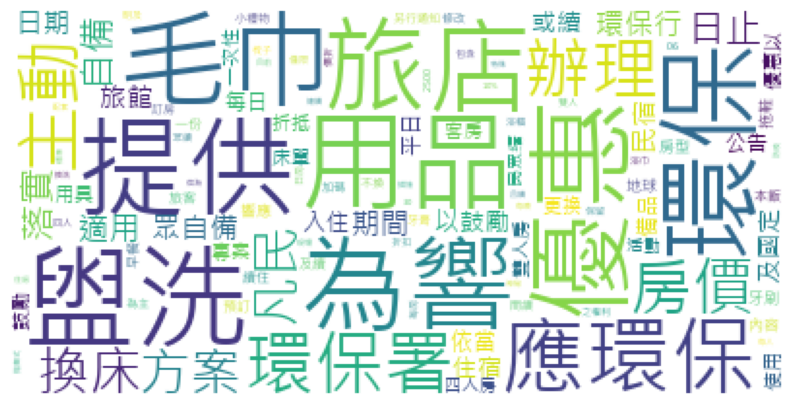

In [72]:
font = "C:\Windows\Fonts\MSJH.TTC"#字體路徑
#文字雲呈現
wordcloud = WordCloud(background_color = "white", font_path=font,)
wordcloud.generate_from_frequencies(diction)
#調整大小
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()